In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Fixes randomness , everytime you run - same data generates
np.random.seed(42)

# generate 50 sample , each sample has 2 features  + shift all class 0 points towards(-2,-2) so class 0 is centered at bottom left
X0 = np.random.randn(50,2) + np.array([-2,-2])

# same as X0 just it shifted to (2,2) so class 1 is top right
X1 = np.random.randn(50,2) + np.array([2,2])

# vstack - vertical stack , combine class 0 and class 1 , final - (100,2)
X = np.vstack((X0,X1))

# create labels , first 50 - 0 and next 50 - 1
y = np.hstack((np.zeros(50), np.ones(50)))

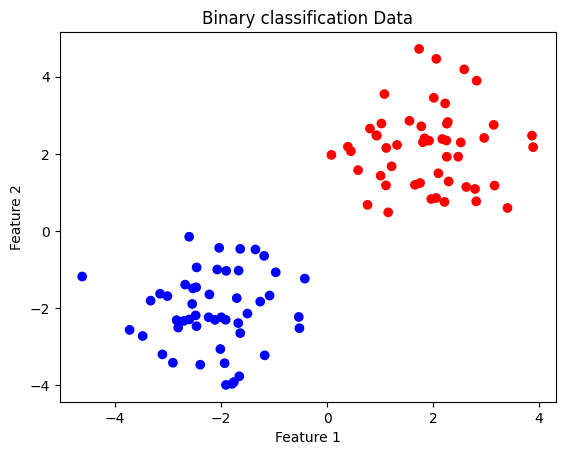

In [4]:
# X[:0] = all rows , column 0 => feature 1
# X[:,1] = all rows . column 1 => feature 2
# bwr - blue , white , red
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Binary classification Data")
plt.show()

In [5]:
# Define sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))


# here z = wx + b (w - weight/slope and b- bias/intercept)

In [ ]:
# X.shape - (100,2) so m=100(samples) and n=2(features)
m, n = X.shape

# intializes weight
w = np.zeros(n)

# intializes bias
b = 0

In [ ]:
# Define cost function
def compute_cost(X ,y,w,b):
    m= len(y)

    # np.dot(X,w) = matrix multiplication = Xw , each sample gets linear value + b (add bias to all samples)
    z = np.dot(X,w) + b

    # convert to probability
    y_hat = sigmoid(z)

    # Log loss formula
    cost = -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return cost

In [ ]:
#Gradient Descent

# w = w - learning rate*gradient
# if learning rate small - training slow , too large - overshoot , just right - smooth
learning_rate = 0.1

# model will update weights 1000 times
epochs = 1000

for i in range(epochs):
    z = np.dot(X,w)+b

    # error term , if prediction is high but actual is 0 - positive error
    y_hat = sigmoid(z)

    # compute gradient for weights and /m is average gradient
    # (y_hat - y) is error term (actual-predicted) and here X.T is transpose of X
    dw = np.dot(X.T, (y_hat-y))/m

    # gradient for bias
    db = np.sum(y_hat-y)/m

    # move opposite to gradient , beacuse gradient points towards increasing loss and we want to descrese loss 
    w = w - learning_rate*dw
    b = b - learning_rate*db

    if i % 100 == 0:
        print("Cost after iteration",i,":",compute_cost(X,y,w,b))

Cost after iteration 0 : 0.5049823381433678
Cost after iteration 100 : 0.024329173838740403
Cost after iteration 200 : 0.01408832751417527
Cost after iteration 300 : 0.010193825659133272
Cost after iteration 400 : 0.008087136329448718
Cost after iteration 500 : 0.006749846907723142
Cost after iteration 600 : 0.00581840276931397
Cost after iteration 700 : 0.00512888757278114
Cost after iteration 800 : 0.004595955840857056
Cost after iteration 900 : 0.004170565373052041


In [ ]:
# Prediction Function

def predict(X,w,b):
    z = np.dot(X,w)+b
    y_hat = sigmoid(z)

    # threshholding - if probability >= 0.5 => class 1 ,  else class 0
    # astype = convert true/false to 1/0
    return(y_hat >= 0.5).astype(int)

In [10]:
y_pred = predict(X,w,b)

accuracy = np.mean(y_pred == y)
print("accuracy: ",accuracy)

accuracy:  1.0


In [11]:
x_values = np.linspace(-5,5,100)
y_values = -(w[0]*x_values+b)/w[1]

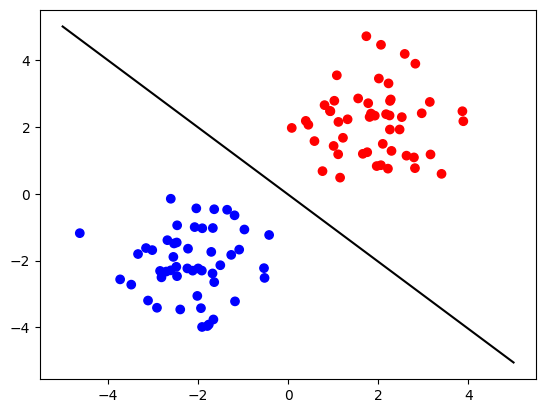

In [12]:
plt.scatter(X[:,0],X[0:,1],c=y,cmap='bwr')
plt.plot(x_values,y_values,color='black')
plt.show()